# Experiment 7: Hough Transform

## Detect straight lines in an image



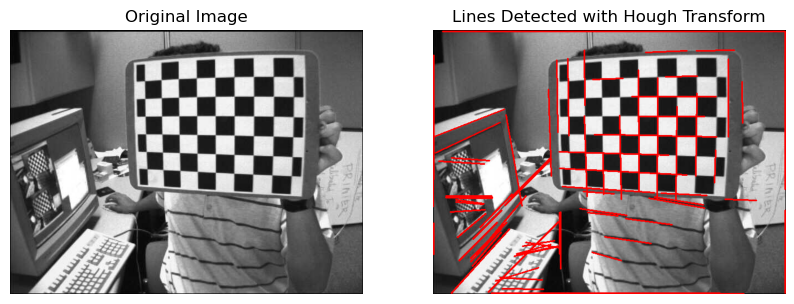

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Image Path
# Replace 'your_image.jpg' with the path to your image file.
# Make sure the image is in the same directory or provide the full path.
image_path = 'left01-Copy1.jpg' 

# 2. Load the image
image = cv2.imread(image_path)
if image is None:
    print(f"Error: Could not load image from {image_path}")
else:
    # 3. Create a copy of the image to draw lines on later
    output_image = image.copy()
    
    # 4. Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # 5. Apply Canny edge detection
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    
    # 6. Apply the Probabilistic Hough Transform
    # Finds line segments instead of infinite lines, which is more practical.
    # Parameters:
    # edges: The output of the Canny detector.
    # rho: The distance resolution of the accumulator in pixels.
    # theta: The angle resolution of the accumulator in radians.
    # threshold: The minimum number of votes (intersections) to be considered a line.
    # minLineLength: The minimum length of a line to be considered a valid line segment.
    # maxLineGap: The maximum allowed gap between line segments to treat them as a single line.
    lines = cv2.HoughLinesP(
        edges, 
        rho=1,
        theta=np.pi/180,
        threshold=100,
        minLineLength=50,
        maxLineGap=10
    )
    
    # 7. Draw the detected lines on the output image
    if lines is not None:
        for line in lines:
            # line is a 2D array, e.g., [[x1, y1, x2, y2]]
            x1, y1, x2, y2 = line[0]
            # Draw a line from (x1, y1) to (x2, y2)
            cv2.line(output_image, (x1, y1), (x2, y2), (0, 0, 255), 2)
    
    # 8. Display the results using Matplotlib
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    # Display the original image
    axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    
    # Display the image with detected lines
    axes[1].imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
    axes[1].set_title('Lines Detected with Hough Transform')
    axes[1].axis('off')
    
    plt.show()